In [ ]:
from google.colab import files
uploaded = files.upload()


Saving bank-additional-full.csv to bank-additional-full.csv


In [ ]:
!pip install -q imblearn


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


In [ ]:
df = pd.read_csv('bank-additional-full.csv', sep=';')


In [ ]:
# Encode features and label
X = pd.get_dummies(df.drop('y', axis=1))
le = LabelEncoder()
y = le.fit_transform(df['y'])

# Balance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.936593707250342
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      7332
           1       0.93      0.94      0.94      7288

    accuracy                           0.94     14620
   macro avg       0.94      0.94      0.94     14620
weighted avg       0.94      0.94      0.94     14620



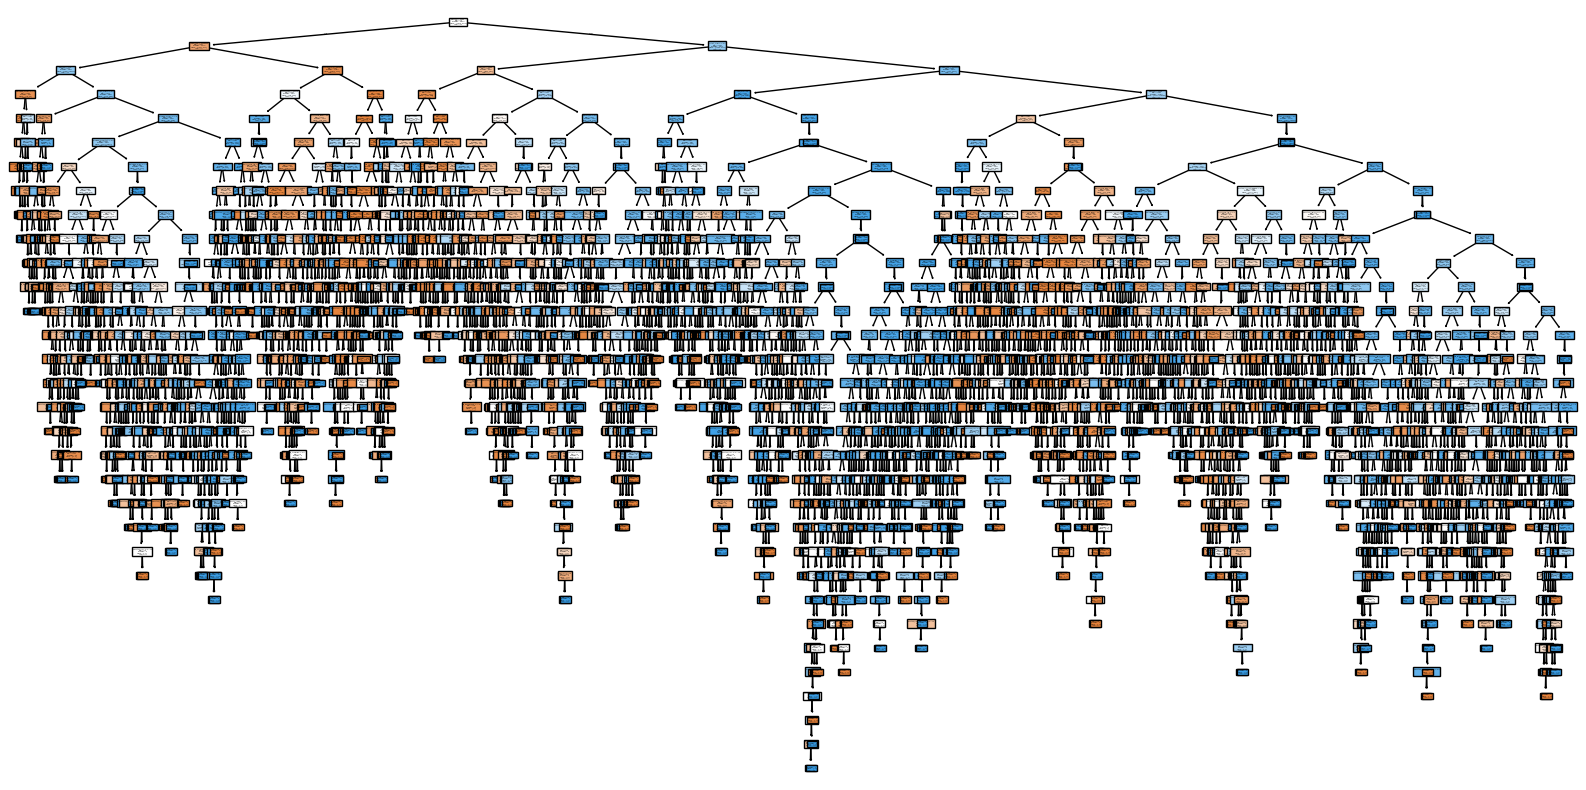

Top 10 important features:
 duration             0.387127
nr.employed          0.144067
contact_cellular     0.081866
cons.conf.idx        0.076651
euribor3m            0.035303
age                  0.026774
cons.price.idx       0.026282
contact_telephone    0.017202
month_oct            0.013122
housing_no           0.011898
dtype: float64


In [ ]:
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.show()

importance = clf.feature_importances_
feat_imp = pd.Series(importance, index=X.columns).sort_values(ascending=False)
print("Top 10 important features:\n", feat_imp.head(10))
